# classification using ML models
knn,svm, decision tree, random forest

In [1]:
from yellowbrick.classifier import ROCAUC
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df = pd.read_csv("ORB_new_features_SRAD_1607.csv")
df.head()

,Unnamed: 0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature1016,feature1017,feature1018,feature1019,feature1020,feature1021,feature1022,feature1023,feature1024,views
0,image1584,-0.464779,-0.467063,1.261675,-0.383177,-0.566576,-0.550762,-0.408046,-0.466499,-0.32368,...,-0.450566,-0.570958,-0.495311,-0.354169,-0.447869,-0.375996,-0.478856,-0.614808,-0.524925,PSAX
1,image17,-0.464779,-0.467063,1.261675,-0.383177,0.821362,-0.550762,-0.408046,-0.466499,-0.32368,...,-0.450566,-0.570958,-0.495311,-0.354169,-0.447869,-0.375996,-0.478856,0.744197,0.755127,A2c
2,image864,-0.464779,-0.467063,-0.459472,-0.383177,-0.566576,-0.550762,-0.408046,-0.466499,-0.32368,...,-0.450566,-0.570958,-0.495311,-0.354169,-0.447869,-0.375996,-0.478856,-0.614808,-0.524925,PLAX
3,image695,-0.464779,-0.467063,-0.459472,-0.383177,0.821362,0.764356,-0.408046,0.697575,-0.32368,...,-0.450566,-0.570958,1.000863,-0.354169,-0.447869,-0.375996,0.989697,0.744197,-0.524925,A4c
4,image605,-0.464779,-0.467063,-0.459472,-0.383177,2.209299,-0.550762,-0.408046,-0.466499,-0.32368,...,1.229387,-0.570958,-0.495311,0.991337,-0.447869,-0.375996,-0.478856,-0.614808,-0.524925,A4c


In [3]:
len(df)

1607

df = df.replace({"views":  {"PSAX":1,"PLAX":2, "A4c":3,"A2c":4}})
df["views"]

In [4]:
X = df.iloc[:,1:1025]
X.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature1015,feature1016,feature1017,feature1018,feature1019,feature1020,feature1021,feature1022,feature1023,feature1024
0,-0.464779,-0.467063,1.261675,-0.383177,-0.566576,-0.550762,-0.408046,-0.466499,-0.32368,-0.523233,...,-0.618462,-0.450566,-0.570958,-0.495311,-0.354169,-0.447869,-0.375996,-0.478856,-0.614808,-0.524925
1,-0.464779,-0.467063,1.261675,-0.383177,0.821362,-0.550762,-0.408046,-0.466499,-0.32368,-0.523233,...,-0.618462,-0.450566,-0.570958,-0.495311,-0.354169,-0.447869,-0.375996,-0.478856,0.744197,0.755127
2,-0.464779,-0.467063,-0.459472,-0.383177,-0.566576,-0.550762,-0.408046,-0.466499,-0.32368,2.528802,...,0.779385,-0.450566,-0.570958,-0.495311,-0.354169,-0.447869,-0.375996,-0.478856,-0.614808,-0.524925
3,-0.464779,-0.467063,-0.459472,-0.383177,0.821362,0.764356,-0.408046,0.697575,-0.32368,-0.523233,...,-0.618462,-0.450566,-0.570958,1.000863,-0.354169,-0.447869,-0.375996,0.989697,0.744197,-0.524925
4,-0.464779,-0.467063,-0.459472,-0.383177,2.209299,-0.550762,-0.408046,-0.466499,-0.32368,-0.523233,...,0.779385,1.229387,-0.570958,-0.495311,0.991337,-0.447869,-0.375996,-0.478856,-0.614808,-0.524925


In [5]:
Y = df["views"]
Y.head()

0    PSAX
1     A2c
2    PLAX
3     A4c
4     A4c
Name: views, dtype: object

In [6]:
x_array = np.array(X)
x_array.shape

(1607, 1024)

In [7]:
def plotHistogram(im_features=X, no_clusters=1024):
    x_scalar = np.arange(no_clusters)
    y_scalar = np.array([abs(np.sum(im_features[:,h], dtype=np.int32)) for h in range(no_clusters)])
    plt.bar(x_scalar, y_scalar)
    plt.xlabel("Visual Word Index")
    plt.ylabel("Frequency")
    plt.title("Complete Vocabulary Generated")
    plt.xticks(x_scalar + 0.4, x_scalar)
    plt.savefig("D:/Ratheesha/MTechsem4/models/ml_model_featureextract/hist_orb1")
    plt.show()

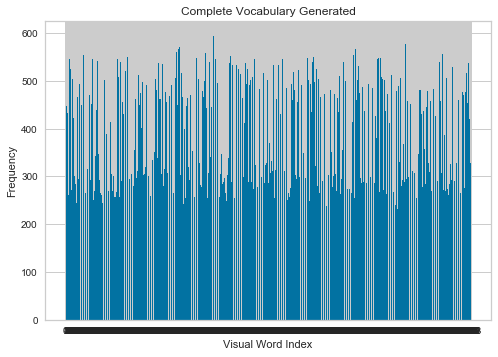

In [8]:
plotHistogram(x_array)

In [9]:
df.groupby(['views']).count()
#Y.count('PLAX')
#Y.count('A2c')
#Y.count('A4c')

,Unnamed: 0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature1015,feature1016,feature1017,feature1018,feature1019,feature1020,feature1021,feature1022,feature1023,feature1024
views,,,,,,,,,,,,,,,,,,,,,
A2c,401,401,401,401,401,401,401,401,401,401,...,401,401,401,401,401,401,401,401,401,401
A4c,401,401,401,401,401,401,401,401,401,401,...,401,401,401,401,401,401,401,401,401,401
PLAX,404,404,404,404,404,404,404,404,404,404,...,404,404,404,404,404,404,404,404,404,404
PSAX,401,401,401,401,401,401,401,401,401,401,...,401,401,401,401,401,401,401,401,401,401


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# svm

In [11]:
classifier = svm.SVC(kernel ='poly',random_state = 0,gamma=10)
#Fit the model for the data

classifier.fit(X_train, y_train)

#Make the prediction
y_pred = classifier.predict(X_test)

In [12]:
y_pred

array(['PLAX', 'A2c', 'PSAX', 'A4c', 'PLAX', 'PLAX', 'A4c', 'A2c', 'PLAX',
       'PSAX', 'A2c', 'PSAX', 'PLAX', 'A4c', 'PSAX', 'PLAX', 'A2c', 'A2c',
       'A2c', 'A4c', 'A4c', 'PLAX', 'PLAX', 'A4c', 'PSAX', 'PLAX', 'A4c',
       'A4c', 'PSAX', 'PSAX', 'A4c', 'A2c', 'A2c', 'A2c', 'PLAX', 'PLAX',
       'A2c', 'PSAX', 'A4c', 'PSAX', 'A4c', 'PSAX', 'PLAX', 'PSAX',
       'PSAX', 'PLAX', 'A2c', 'A2c', 'PSAX', 'A4c', 'A2c', 'PLAX', 'PSAX',
       'PLAX', 'A2c', 'PLAX', 'A2c', 'PLAX', 'A2c', 'PLAX', 'PLAX', 'A2c',
       'PLAX', 'A2c', 'PSAX', 'A2c', 'PSAX', 'PSAX', 'A2c', 'PLAX',
       'PLAX', 'A4c', 'A2c', 'A4c', 'A2c', 'PLAX', 'PSAX', 'A2c', 'A2c',
       'A2c', 'A2c', 'A2c', 'PSAX', 'A2c', 'A4c', 'A4c', 'A4c', 'PLAX',
       'PLAX', 'PSAX', 'A2c', 'PLAX', 'A2c', 'PSAX', 'A2c', 'PSAX',
       'PSAX', 'A2c', 'PLAX', 'PSAX', 'A2c', 'PLAX', 'A2c', 'PLAX', 'A2c',
       'PLAX', 'PSAX', 'PLAX', 'PLAX', 'PSAX', 'A4c', 'PSAX', 'PSAX',
       'PSAX', 'PLAX', 'PLAX', 'A2c', 'PLAX', 'A2c', 'PLAX

In [13]:
print("no of PLAX :",list(y_pred).count('PLAX')-list(y_test).count('PLAX'))
print("no of PSAX :",list(y_pred).count('PSAX')-list(y_test).count('PSAX'))
print("no of A4C :",list(y_pred).count('A4c')-list(y_test).count('A4c'))
print("no of A2C :",list(y_pred).count('A2c')-list(y_test).count('A2c'))

no of PLAX : 14
no of PSAX : -2
no of A4C : -10
no of A2C : -2


In [14]:
print("no of PLAX :",list(y_test).count('PLAX'))
print("no of PSAX :",list(y_test).count('PSAX'))
print("no of A4C :",list(y_test).count('A4c'))
print("no of A2C :",list(y_test).count('A2c'))

no of PLAX : 99
no of PSAX : 98
no of A4C : 103
no of A2C : 102


In [15]:
y_test

175      A4c
317      A2c
1478    PSAX
746      A4c
182     PLAX
        ... 
309      A2c
847     PLAX
989      A4c
47       A2c
1192     A4c
Name: views, Length: 402, dtype: object

In [16]:
accuracy_score(y_test, y_pred)

0.9651741293532339

In [17]:
y_pred_train = classifier.predict(X_train)
accuracy_score(y_train, y_pred_train)

1.0

In [18]:

cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[100   0   2   0]
 [  0  93  10   0]
 [  0   0  99   0]
 [  0   0   2  96]]
Accuracy: 92.03 %
Standard Deviation: 2.37 %


In [19]:
print(classification_report(y_test, y_pred,target_names=['A2C','A4C','PLAX','PSAX']))

              precision    recall  f1-score   support

         A2C       1.00      0.98      0.99       102
         A4C       1.00      0.90      0.95       103
        PLAX       0.88      1.00      0.93        99
        PSAX       1.00      0.98      0.99        98

    accuracy                           0.97       402
   macro avg       0.97      0.97      0.97       402
weighted avg       0.97      0.97      0.97       402



In [45]:
from sklearn import metrics
recall_specificity = metrics.recall_score(y_test, y_pred, pos_label=0,average='macro')
recall_specificity

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1317: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


0.9657241537391656

In [46]:
recall_sens = metrics.recall_score(y_test, y_pred, pos_label=1,average='macro')
recall_sens

0.9657241537391656

In [20]:
import seaborn as sns
def bothconfusion_m(cm):
    sns.heatmap(cm, annot=True,fmt='.2f',cmap='Oranges',xticklabels=['A2C','A4C','PLAX','PSAX'],yticklabels=['A2C','A4C','PLAX','PSAX'])
    plt.title("CONFUSION MATRIX FOR VIEW CLASSIFICATION")
    plt.ylim(4.0,0)
    plt.show()
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Oranges',xticklabels=['A2C','A4C','PLAX','PSAX'],yticklabels=['A2C','A4C','PLAX','PSAX'])
    plt.title("NORMALIZED CONFUSION MATRIX IN %")
    plt.ylim(4.0,0)
    plt.show()
    

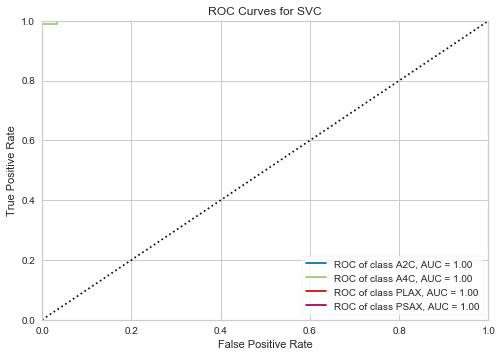

In [28]:
visualizer1 = ROCAUC(classifier,micro=False,macro=False, classes=['A2C','A4C','PLAX','PSAX'])
visualizer1.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer1.score(X_test, y_test)        # Evaluate the model on the test data
visualizer1.show("D:/Ratheesha/MTechsem4/models/ml_model_featureextract/svc_roccurve_orb")

plt.show()

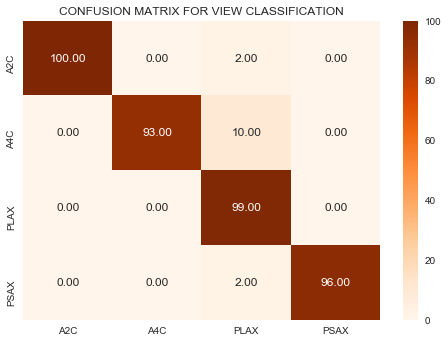

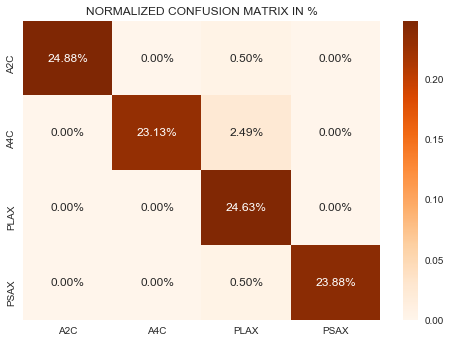

In [29]:
bothconfusion_m(cm)

# DECISION TREE

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt_classifier = DecisionTreeClassifier(criterion='entropy')

dt_classifier.fit(X_train, y_train)

#Make the prediction
y_pred1 = dt_classifier.predict(X_test)
y_pred1

array(['A2c', 'A2c', 'PSAX', 'A4c', 'A4c', 'PLAX', 'A4c', 'A2c', 'A4c',
       'PLAX', 'A2c', 'A4c', 'PLAX', 'A4c', 'A2c', 'PLAX', 'PLAX', 'A2c',
       'PSAX', 'A4c', 'A4c', 'PLAX', 'PSAX', 'A4c', 'PSAX', 'PLAX', 'A4c',
       'A4c', 'PSAX', 'PSAX', 'A4c', 'A4c', 'A2c', 'A4c', 'PLAX', 'PLAX',
       'A4c', 'PSAX', 'A2c', 'PLAX', 'PLAX', 'PLAX', 'PLAX', 'PSAX',
       'PSAX', 'PLAX', 'A4c', 'A2c', 'PSAX', 'A4c', 'A4c', 'A4c', 'PSAX',
       'A4c', 'PLAX', 'PLAX', 'A2c', 'PLAX', 'A2c', 'PLAX', 'PLAX', 'A2c',
       'PLAX', 'A2c', 'PLAX', 'A2c', 'PSAX', 'PSAX', 'A2c', 'A2c', 'PLAX',
       'PLAX', 'PLAX', 'A4c', 'A2c', 'A2c', 'A4c', 'PSAX', 'A2c', 'A4c',
       'A2c', 'A2c', 'PSAX', 'A2c', 'A2c', 'A4c', 'A4c', 'PLAX', 'PSAX',
       'PSAX', 'PSAX', 'PLAX', 'A2c', 'PSAX', 'PSAX', 'PSAX', 'PSAX',
       'A2c', 'PLAX', 'PSAX', 'PLAX', 'PLAX', 'A2c', 'PSAX', 'PLAX',
       'PLAX', 'PLAX', 'A4c', 'PLAX', 'PSAX', 'A4c', 'PSAX', 'PSAX',
       'PSAX', 'PLAX', 'PLAX', 'A4c', 'PLAX', 'A2c', 'PLAX

In [32]:
y_pred_train1 = dt_classifier.predict(X_train)
print("the training accuracy for view classification : ",accuracy_score(y_train, y_pred_train1))
print("the test accuracy for view classification : ",accuracy_score(y_test, y_pred1))

the training accuracy for view classification :  1.0
the test accuracy for view classification :  0.7562189054726368


In [47]:
recall_specificity1 = metrics.recall_score(y_test, y_pred1, pos_label=0,average='macro')
recall_specificity1

0.7558942965241408

In [48]:
print(classification_report(y_test, y_pred1,target_names=['A2C','A4C','PLAX','PSAX']))

              precision    recall  f1-score   support

         A2C       0.78      0.74      0.76       102
         A4C       0.73      0.80      0.76       103
        PLAX       0.72      0.77      0.75        99
        PSAX       0.81      0.72      0.76        98

    accuracy                           0.76       402
   macro avg       0.76      0.76      0.76       402
weighted avg       0.76      0.76      0.76       402



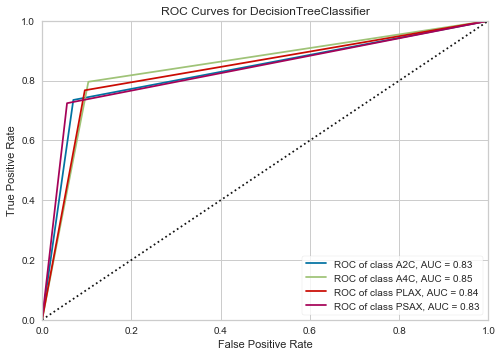

In [33]:
visualizer2 = ROCAUC(dt_classifier,micro=False,macro=False, classes=['A2C','A4C','PLAX','PSAX'])
visualizer2.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer2.score(X_test, y_test)        # Evaluate the model on the test data
visualizer2.show("D:/Ratheesha/MTechsem4/models/ml_model_featureextract/dt_roccurve_orb")
#plt.savefig()
plt.show()

In [34]:
cm_dt = confusion_matrix(y_test, y_pred1)
print(cm_dt)

[[75 12  7  8]
 [ 7 82  9  5]
 [ 5 14 76  4]
 [ 9  5 13 71]]


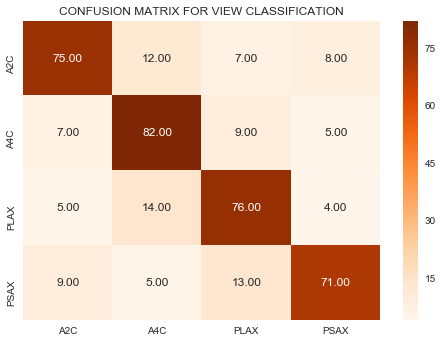

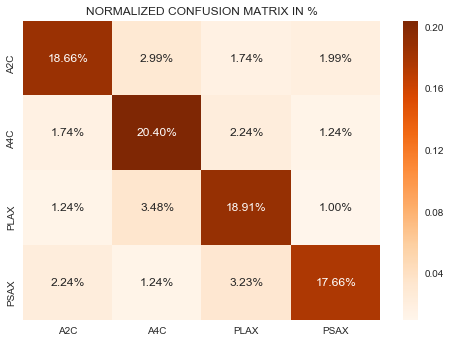

In [35]:
bothconfusion_m(cm_dt)

# RANDOM FOREST CLASSIFIER

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
#Create a Gaussian Classifier
clf_rf=RandomForestClassifier(n_estimators=50)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_rf.fit(X_train,y_train)

y_pred_rf=clf_rf.predict(X_test)
y_pred_rf

array(['A2c', 'A2c', 'PSAX', 'A4c', 'PLAX', 'PLAX', 'A4c', 'A2c', 'PLAX',
       'A2c', 'A2c', 'PSAX', 'PLAX', 'A4c', 'PSAX', 'PLAX', 'A2c', 'A2c',
       'A2c', 'A4c', 'A4c', 'PLAX', 'A2c', 'A4c', 'PSAX', 'PLAX', 'A4c',
       'A4c', 'PSAX', 'PSAX', 'A4c', 'A2c', 'A2c', 'A2c', 'PLAX', 'PLAX',
       'A2c', 'PSAX', 'A4c', 'PSAX', 'A4c', 'PSAX', 'PLAX', 'PSAX',
       'PSAX', 'PLAX', 'A2c', 'A2c', 'PSAX', 'A4c', 'A2c', 'PLAX', 'PSAX',
       'A4c', 'A2c', 'PLAX', 'A2c', 'PLAX', 'A2c', 'PLAX', 'PLAX', 'A2c',
       'PLAX', 'A2c', 'PSAX', 'A2c', 'PSAX', 'PSAX', 'A2c', 'PLAX',
       'PLAX', 'A4c', 'A2c', 'A4c', 'A2c', 'PLAX', 'PSAX', 'A2c', 'A2c',
       'A2c', 'A2c', 'A2c', 'PSAX', 'A2c', 'A2c', 'A4c', 'A4c', 'PLAX',
       'PLAX', 'PSAX', 'A2c', 'PLAX', 'A2c', 'PSAX', 'A2c', 'PSAX',
       'PSAX', 'A2c', 'PLAX', 'PSAX', 'A2c', 'PLAX', 'A2c', 'A4c', 'A4c',
       'A4c', 'PSAX', 'A4c', 'PLAX', 'PSAX', 'A4c', 'PSAX', 'PSAX',
       'PSAX', 'PLAX', 'PLAX', 'A2c', 'PLAX', 'A2c', 'PLAX', 'A4c

In [38]:
y_pred_train_rf = clf_rf.predict(X_train)
print("the training accuracy for view classification : ",accuracy_score(y_train, y_pred_train_rf))
print("the test accuracy for view classification : ",accuracy_score(y_test, y_pred_rf))

the training accuracy for view classification :  1.0
the test accuracy for view classification :  0.9776119402985075


In [49]:
print(classification_report(y_test, y_pred_rf,target_names=['A2C','A4C','PLAX','PSAX']))

              precision    recall  f1-score   support

         A2C       0.94      0.99      0.97       102
         A4C       0.99      0.94      0.97       103
        PLAX       0.98      1.00      0.99        99
        PSAX       1.00      0.98      0.99        98

    accuracy                           0.98       402
   macro avg       0.98      0.98      0.98       402
weighted avg       0.98      0.98      0.98       402



In [50]:
recall_specificity2 = metrics.recall_score(y_test, y_pred_rf, pos_label=0,average='macro')
recall_specificity2

0.9778838719954002

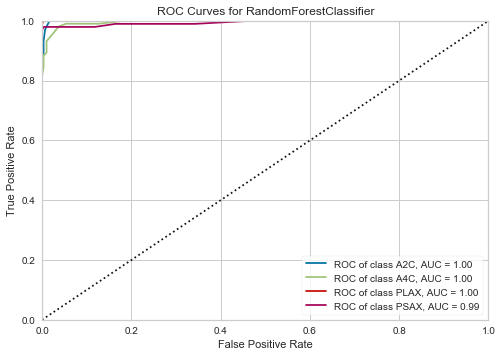

In [39]:
visualizer3 = ROCAUC(clf_rf,micro=False,macro=False, classes=['A2C','A4C','PLAX','PSAX'])
visualizer3.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer3.score(X_test, y_test)        # Evaluate the model on the test data
#visualizer3.show()

#plt.savefig("D:/Ratheesha/MTechsem4/models/ml_model_featureextract/rf_roccurve_orb")
visualizer3.show("D:/Ratheesha/MTechsem4/models/ml_model_featureextract/rf_roccurve_orb")

plt.show()
#plt.imshow()



In [40]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[101   1   0   0]
 [  4  97   2   0]
 [  0   0  99   0]
 [  2   0   0  96]]


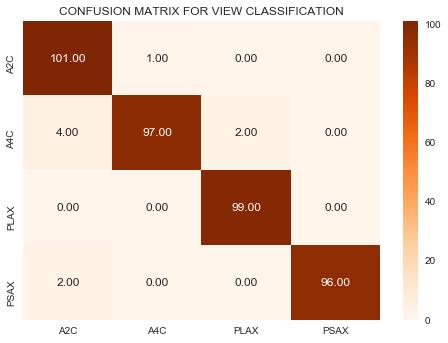

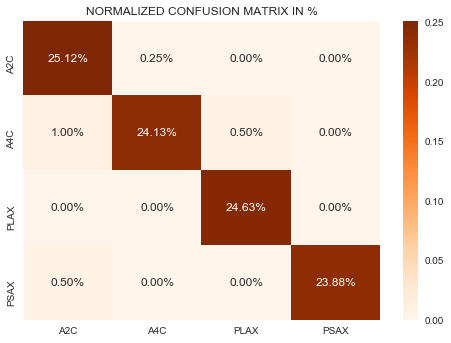

In [41]:
bothconfusion_m(cm_rf)